In [10]:
import numpy as np
import pandas as pd
import tables

In [11]:
# data = pd.read_hdf('data.h5')
# sales_train_evaluation.csv

In [12]:
INPUT_DIR = '../../input/m5-forecasting-accuracy/'
OUTPUT_DIR =  '../../input/lv2/'

In [13]:
cal = pd.read_csv(INPUT_DIR+'calendar.csv')

In [15]:
# week day feature

# add big sports event
superbowl_days = ['2016-01-09','2016-01-10','2016-01-16','2016-01-17', '2016-01-24',  '2016-01-31', '2016-02-07',
'2015-01-03','2015-01-04','2015-01-10','2015-01-11','2015-01-18','2015-01-25','2015-02-01',
 '2014-01-04','2014-01-05','2014-01-11','2014-01-12','2014-01-19','2014-01-26','2014-02-02',
'2013-01-05','2013-01-06','2013-01-12','2013-01-13','2013-01-20','2013-01-27','2013-02-03',
'2012-01-07','2012-01-08','2012-01-14','2012-01-15','2012-01-22','2012-01-29','2012-02-05',
'2011-01-30','2011-02-06']
cal.loc[cal['date'].isin(superbowl_days),'sports']=1

nba_days = ['2013-06-06','2013-06-09','2013-06-10','2013-06-11','2013-06-13','2013-06-16','2013-06-18','2013-06-20',
 '2014-06-05','2014-06-08','2014-06-10','2014-06-12','2014-06-15',
 '2015-06-04','2015-06-07','2015-06-09','2015-06-11','2015-06-14','2015-06-16',
'2016-06-02','2016-06-05','2016-06-08','2016-06-10','2016-06-13','2016-06-16','2016-06-19']
cal.loc[cal['date'].isin(nba_days),'sports']=1

# add Ramadan
Ramadan_days= []
Ramadan_end =['2011-08-29','2012-08-18','2013-08-07','2014-07-27','2015-07-16','2016-06-19']
for i,t in zip(cal[cal['event_name_1']=='Ramadan starts'].index.tolist(),cal[cal['date'].isin(Ramadan_end)].index.tolist()):
    Ramadan_days.extend(pd.DatetimeIndex(cal['date'].iloc[i:(t+1)]).tolist())
_Ramadan_days = pd.DatetimeIndex(Ramadan_days)
Ramadan_days = [str(days)[:10] for days in _Ramadan_days]
cal.loc[cal['date'].isin(Ramadan_days),'ramadan']=1

# black friday
black_friday_days = ['2011-11-25', '2012-11-23', '2013-11-29', '2014-11-28', '2015-11-27']
cal.loc[cal['date'].isin(black_friday_days),'event_name_1']='black_friday'

# Eid_ul_Fitr_day
Eid_ul_Fitr_days = ['2011-08-30','2012-08-19','2013-08-08','2014-07-28','2015-07-17','2016-06-20']
cal.loc[cal['date'].isin(Eid_ul_Fitr_days),'event_name_1']='Eid_ul_Fitr_day'

In [16]:
cal_ = cal.loc[:,['wday','month','event_name_1','sports','ramadan','snap_CA','snap_TX','snap_WI']]
cal_['day_type'] = cal_['wday'].map({1: 5,2:6,3: 0,4:2,5:2,6:2,7:4})
cal_.loc[cal_['event_name_1'].isna(), 'holi_bool'] = 0
cal_.loc[~cal_['event_name_1'].isna(), 'holi_bool'] = 1
cal_['holi_-1'] = cal_["holi_bool"].shift(1)
cal_['holi_1'] = cal_["holi_bool"].shift(-1)
cal_.loc[cal_['holi_-1']==1, 'day_type'] = 8
cal_.loc[cal_['holi_1']==1, 'day_type'] = 8
cal_.loc[cal_['holi_bool']==1, 'day_type'] = 7
cal_ = cal_.fillna(0)
cal_.drop(['month','event_name_1','holi_bool','holi_-1','holi_1'], axis=1, inplace=True)

In [18]:
cal_.to_csv(OUTPUT_DIR+'cal_feat_v2.csv',index=False)

In [19]:
cal_.T

,0,1,2,3,4,5,6,7,8,9,...,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968
wday,1.0,2.0,3.0,4.0,5.0,6.0,7.0,1.0,2.0,3.0,...,7.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,1.0,2.0
sports,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
ramadan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
snap_CA,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
snap_TX,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
snap_WI,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
day_type,5.0,6.0,0.0,2.0,2.0,2.0,4.0,8.0,7.0,8.0,...,4.0,5.0,6.0,0.0,2.0,2.0,2.0,4.0,8.0,7.0


In [20]:
price_df = pd.read_csv(INPUT_DIR+'sell_prices.csv')
cal_df = pd.read_csv(INPUT_DIR+'calendar.csv')
sales = pd.read_csv(INPUT_DIR+'sales_train_evaluation.csv')
store_list = price_df['store_id'].unique().tolist()
for store in store_list:
    print(store)
    p_df = pd.merge(price_df, cal_df.loc[:,['wm_yr_wk', 'd']], on='wm_yr_wk')
    p_df = p_df[p_df['store_id']==store].loc[:,['item_id','sell_price','d']]
    p_df = p_df.set_index(['item_id','d'])
    p_df = p_df.unstack(level='d').rename(columns= lambda x: x[2:])
    levels = p_df.columns.levels
    labels = p_df.columns.labels
    p_df.columns = levels[1][labels[1]]
    new_idx=[str(i+1) for i in range(1969)]
    p_df = p_df.loc[:,new_idx]
    p_df = pd.merge(sales.loc[:,'item_id'], p_df, on='item_id', how='left')
    p_df = p_df.fillna(0)
#     p_df.to_csv(f"{OUTPUT_DIR}price_{store}.csv",index=False)

CA_1


/Users/shukigoto/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  if sys.path[0] == '':


CA_2
CA_3
CA_4
TX_1
TX_2
TX_3
WI_1
WI_2
WI_3


In [21]:
p_df.fillna(0)

,item_id,1,2,3,4,5,6,7,8,9,...,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969
0,HOBBIES_1_001,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38,8.38
1,HOBBIES_1_002,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97,3.97
2,HOBBIES_1_003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97,2.97
3,HOBBIES_1_004,4.34,4.34,4.34,4.34,4.34,4.34,4.34,4.34,4.34,...,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64,4.64
4,HOBBIES_1_005,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,2.50,...,2.98,2.98,2.98,2.98,2.98,2.98,2.98,2.98,2.98,2.98
30486,FOODS_3_824,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,...,2.48,2.48,2.48,2.48,2.48,2.48,2.48,2.48,2.48,2.48
30487,FOODS_3_825,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,3.98,3.98,3.98,3.98,3.98,3.98,3.98,3.98,3.98,3.98
30488,FOODS_3_826,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28,1.28


In [23]:
sales = pd.read_csv(INPUT_DIR+'sales_train_evaluation.csv')

In [25]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [46]:
lv2_sales = pd.DataFrame(columns=[f'd_{i+1}' for i in range(1941)],index=['CA','TX','WI'])

In [58]:
for state in ['CA','TX','WI']:
    state_df = sales.loc[sales['state_id']==state]
    lv2_sales.loc[state,:] = np.array(state_df.iloc[:,6:]).sum(axis=0)

In [77]:
lv2_sales = lv2_sales.reset_index()

In [78]:
lv2_sales.to_csv(OUTPUT_DIR+'sales_lv2.csv', index=False)

In [70]:
cal.tail(10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sports,ramadan
1959,2016-06-10,11619,Friday,7,6,2016,d_1960,NaN,NaN,NaN,NaN,1,0,0,1.0,1.0
1960,2016-06-11,11620,Saturday,1,6,2016,d_1961,NaN,NaN,NaN,NaN,0,1,1,NaN,1.0
1961,2016-06-12,11620,Sunday,2,6,2016,d_1962,NaN,NaN,NaN,NaN,0,1,1,NaN,1.0
1962,2016-06-13,11620,Monday,3,6,2016,d_1963,NaN,NaN,NaN,NaN,0,1,0,1.0,1.0
1963,2016-06-14,11620,Tuesday,4,6,2016,d_1964,NaN,NaN,NaN,NaN,0,0,1,NaN,1.0
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1,NaN,1.0
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0,1.0,1.0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0,NaN,1.0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1.0,1.0


In [71]:
cal[cal['d']=='d_1962']

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sports,ramadan
1961,2016-06-12,11620,Sunday,2,6,2016,d_1962,NaN,NaN,NaN,NaN,0,1,1,NaN,1.0


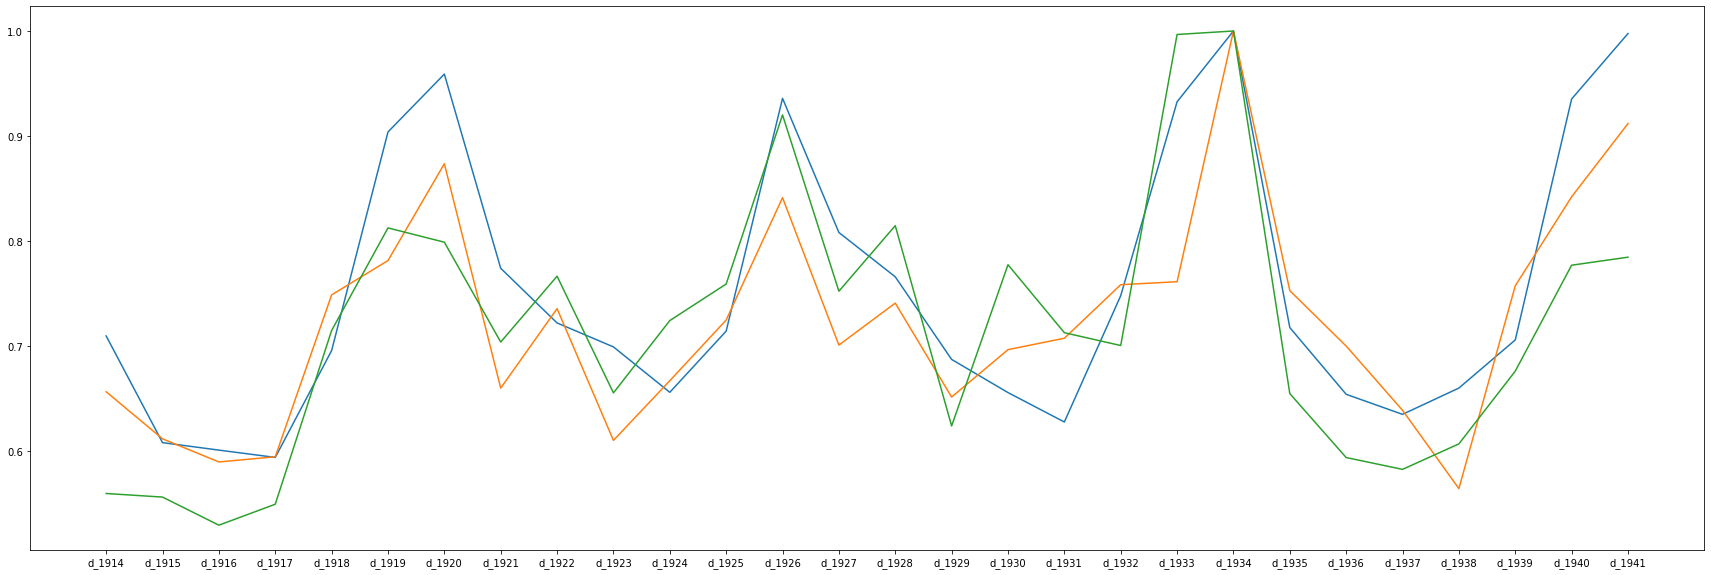

In [91]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(30, 10))
for i in range(3):
    plt.plot(lv2_sales.iloc[i,-28:] / lv2_sales.iloc[i,-30:].max())
plt.show()

In [88]:
lv2_sales.iloc[i,-365:].max()

19669